<a href="https://colab.research.google.com/github/SanikaPanchabhai/19-ML-Practical/blob/main/Bonus_ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-3d61e4431f60>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-4-3d61e4431f60>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     10134
           1       0.86      0.85      0.86      9179

    accuracy                           0.86     19313
   macro avg       0.86      0.86      0.86     19313
weighted avg       0.86      0.86      0.86     19313



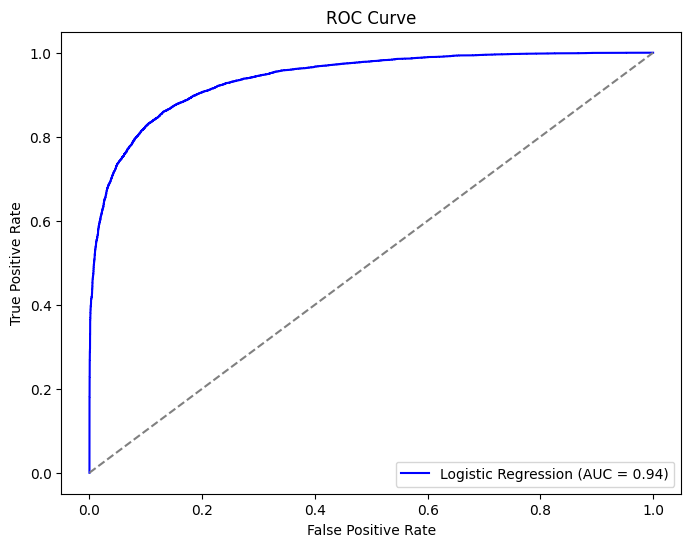

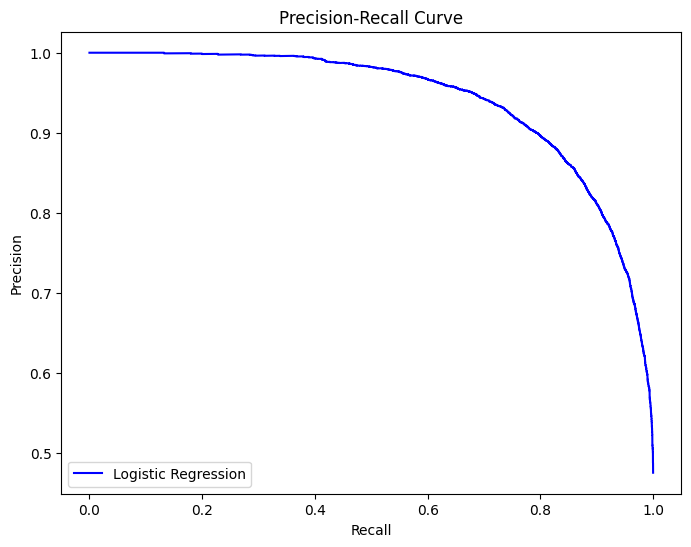

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     10134
           1       1.00      0.99      1.00      9179

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



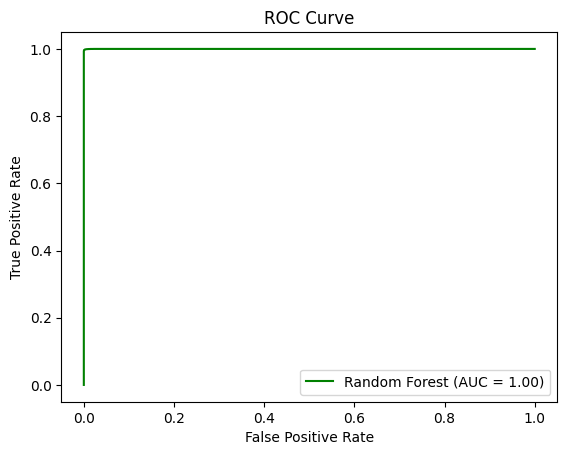

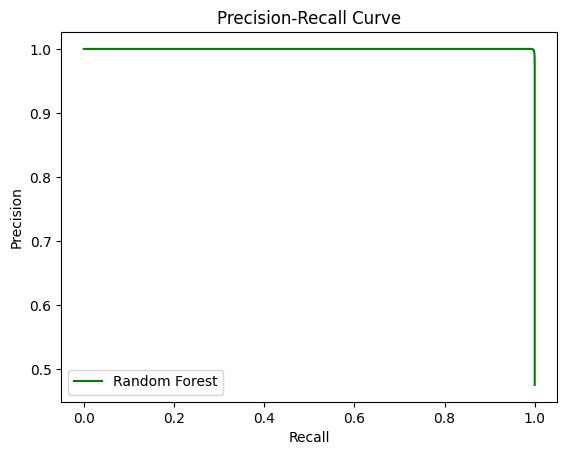

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_curve, auc, mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset (assuming the CSV file is 'customer_churn.csv')
df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

# Display first few rows of the dataset
df.head()

# Handle missing values (if any)
# Impute numerical features with their mean
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Impute categorical features with their mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Encoding categorical columns using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split data into features (X) and target (y)
X = df.drop('Churn', axis=1)  # Assuming 'Churn' is the target column
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Train and evaluate Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, color='green', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Train and evaluate Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', label=f'SVM (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, svm.predict_proba(X_test_scaled)[:, 1])
plt.plot(recall, precision, color='red', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Feature Scaling Comparison: Logistic Regression without scaling
logreg_no_scale = LogisticRegression()
logreg_no_scale.fit(X_train, y_train)
y_pred_no_scale = logreg_no_scale.predict(X_test)

print("Logistic Regression (No Scaling) Classification Report:\n", classification_report(y_test, y_pred_no_scale))
print("Logistic Regression (With Scaling) Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Feature selection using SelectKBest (ANOVA F-statistic)
selector = SelectKBest(f_classif, k=5)  # Select the top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Logistic Regression with feature selection
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train_selected, y_train)
y_pred_selected = logreg_selected.predict(X_test_selected)

# Classification report with feature selection
print("Logistic Regression with Feature Selection Classification Report:\n", classification_report(y_test, y_pred_selected))

# Regression Model: Linear Regression for churn probability prediction (optional)
from sklearn.linear_model import LinearRegression

# Linear Regression for churn probability prediction
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict churn probabilities
y_pred_prob = regressor.predict(X_test_scaled)

# Residual plot
residuals = y_test - y_pred_prob
plt.scatter(y_pred_prob, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_prob)
print(f"Mean Squared Error of Regression Model: {mse:.2f}")
